In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None)

#### Nama : Muhammad Pudja Gemilang
#### NIM : 10119055
#### Universitas : Institut Teknologi Bandung
#### Tanggal Pengerjaan Tugas : 12 November 2020 
#### Sumber Data : kaggle.com


## Data Importing
Dilakukan Import data dari dataset yang telah di download dari kaggle.com

In [3]:
# Read CSV
data1 = pd.read_csv("D:/PUDJA/PROGRAMMING/Data Science/Self Project DS/BRICS Development Indicators/Economy_Data.csv", sep=";")
data2 = pd.read_csv("D:/PUDJA/PROGRAMMING/Data Science/Self Project DS/BRICS Development Indicators/EducationAndEnviron_Data.csv", sep=";")
data3 = pd.read_csv("D:/PUDJA/PROGRAMMING/Data Science/Self Project DS/BRICS Development Indicators/HealthAndPoverty_Data.csv", sep=";")
data4 = pd.read_csv("D:/PUDJA/PROGRAMMING/Data Science/Self Project DS/BRICS Development Indicators/PrivateSector_Data.csv", sep=";")
data5 = pd.read_csv("D:/PUDJA/PROGRAMMING/Data Science/Self Project DS/BRICS Development Indicators/PublicSector_Indicators.csv", sep=";")

## Data Cleaning
Dilakukan cleaning data dengan menghapus baris - baris yang berisi nilai NA pada kolom Value agar memudahkan untuk melakukan eksplorasi dan visualisasi data

In [4]:
# Drop NA out of CountryName and Value columns
data1.dropna(subset=["Value"], inplace=True)
data2.dropna(subset=["Value"], inplace=True)
data3.dropna(subset=["Value"], inplace=True)
data4.dropna(subset=["Value"], inplace=True)
data5.dropna(subset=["Value"], inplace=True)

## Data Preprocessing
Melakukan preprocessing pada data dengan mengubah struktur pada setiap DataFrame dimana tiap kategori yang berada pada kolom "SeriesName" diubah menjadi kolom - kolom baru pada DataFrame untuk memudahkan melakukan subsetting dan eksplorasi pada data

In [5]:
# Mengubah Kategori - kategori pada kolom "SeriesName" menjadi kolom - kolom baru
df1 = data1.pivot_table(index=["CountryName", "CountryCode", "Year"], columns="SeriesName", values="Value", aggfunc="mean")
df1.reset_index(level=["CountryName", "CountryCode", "Year"], inplace=True)

df2 = data2.pivot_table(index=["CountryName", "CountryCode", "Year"], columns="SeriesName", values="Value", aggfunc="mean")
df2.reset_index(level=["CountryName", "CountryCode", "Year"], inplace=True)

df3 = data3.pivot_table(index=["CountryName", "CountryCode", "Year"], columns="SeriesName", values="Value", aggfunc="mean")
df3.reset_index(level=["CountryName", "CountryCode", "Year"], inplace=True)

df4 = data4.pivot_table(index=["CountryName", "CountryCode", "Year"], columns="SeriesName", values="Value", aggfunc="mean")
df4.reset_index(level=["CountryName", "CountryCode", "Year"], inplace=True)

df5 = data5.pivot_table(index=["CountryName", "CountryCode", "Year"], columns="SeriesName", values="Value", aggfunc="mean")
df5.reset_index(level=["CountryName", "CountryCode", "Year"], inplace=True)

## Data Exploration and Data Visualization 
Pada bagian ini saya melakukan beberapa eskplorasi data dan visualisasi data untuk mengambil beberapa insight dari data. Berikut beberapa insight yang saya mau ambil dari data tersebut
#### 1. Menyelidiki beberapa hubungan antara GDP per kapita dengan tingkat literasi secara umum di suatu negara 
Note : Narasi dari analisis dan grafik dapat dilihat di output cell

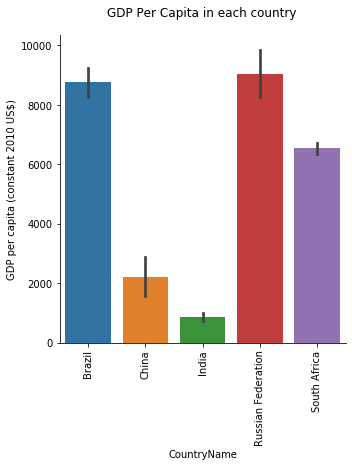

Berdasarkan plot diagram dapat dilihat bahwa dari 5 negara, negara dengan rata - rata GDP per kapita dari 1970 - 2010 terbesar adalah 1. Russia, 2. Brazil, 3. South Afrika, 4. China, 5. India


<Figure size 2880x1440 with 0 Axes>

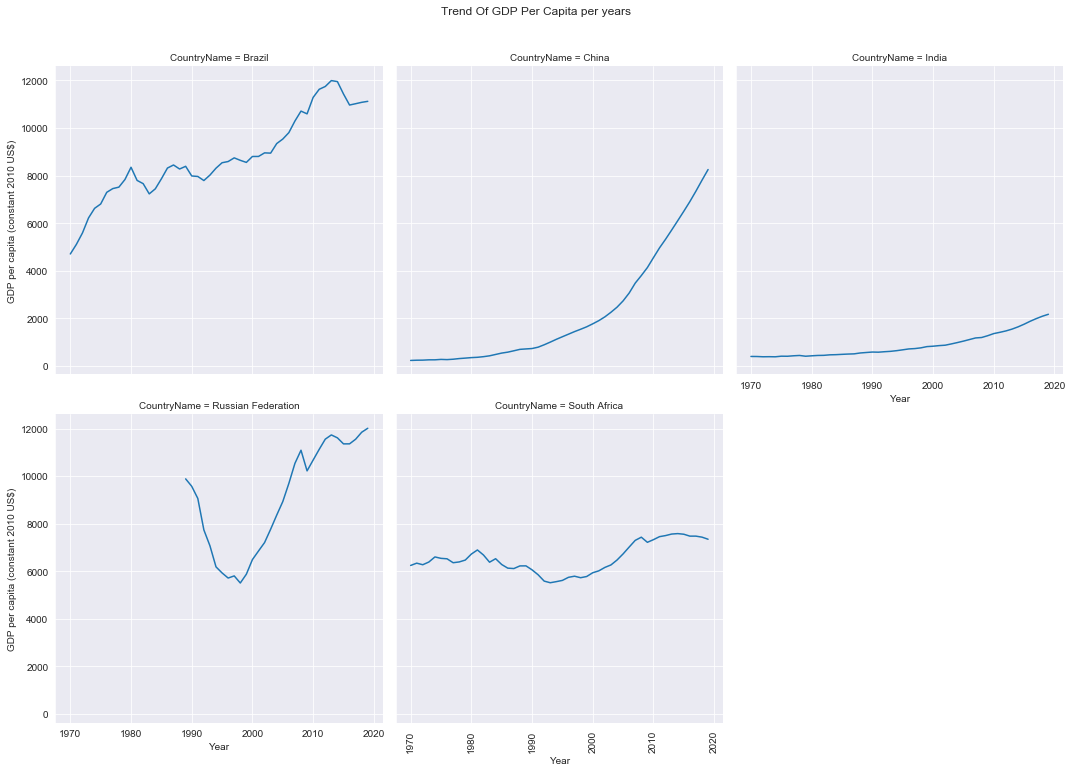

Dapat dilihat bahwa China mengalami trend kenaikan GDP yang terbesar sejak tahun 2000


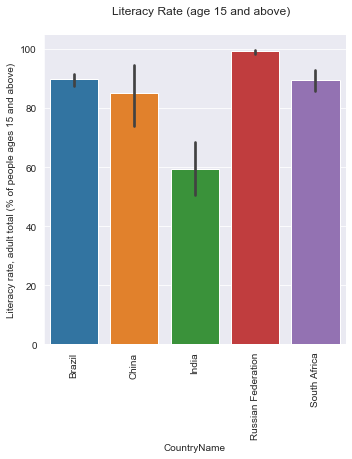

Berdasarkan grafik dapat dilihat Russia memiliki tingkat literasi terbesar sebesar 100 % dan India dengan tingkat literasi terendah sebesar 59 % untuk orang dewasa diatas 15 tahun


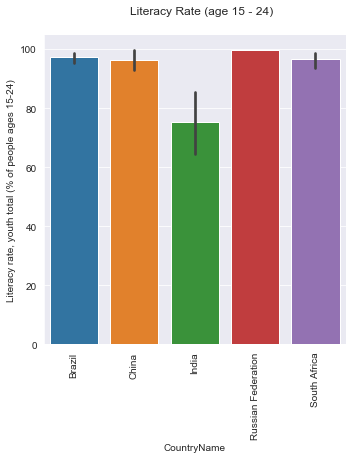

Berdasarkan grafik dapat dilihat Russia memiliki tingkat literasi terbesar sebesar 100 % dan India dengan tingkat literasi terendah sebesar 75 % untuk remaja usia 15 - 24 tahun


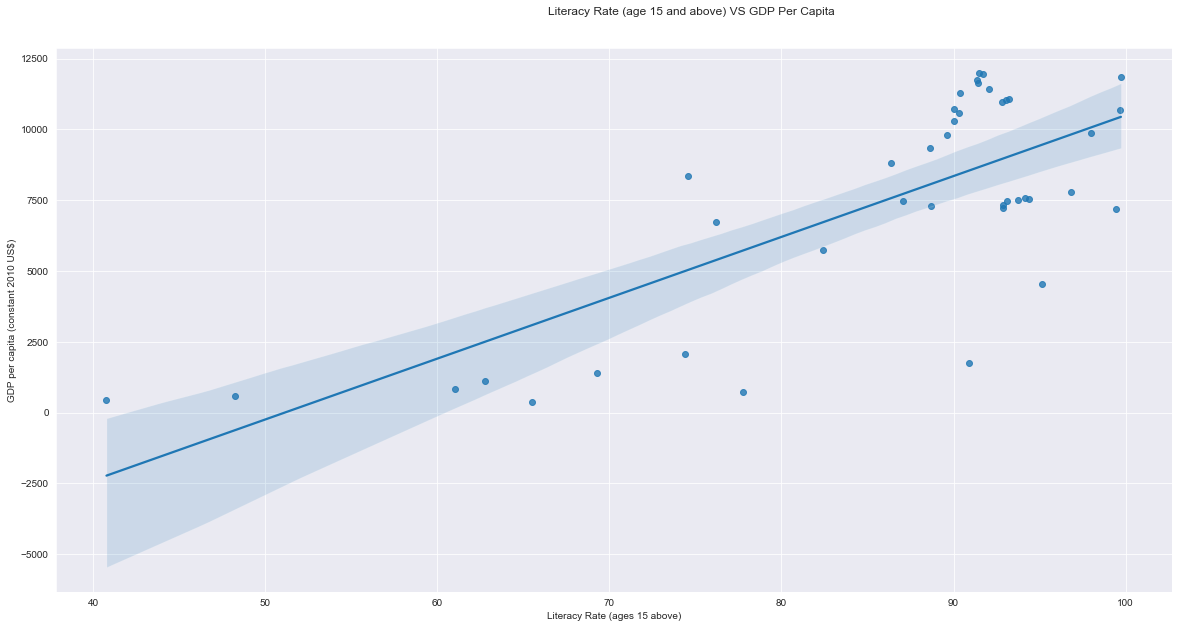

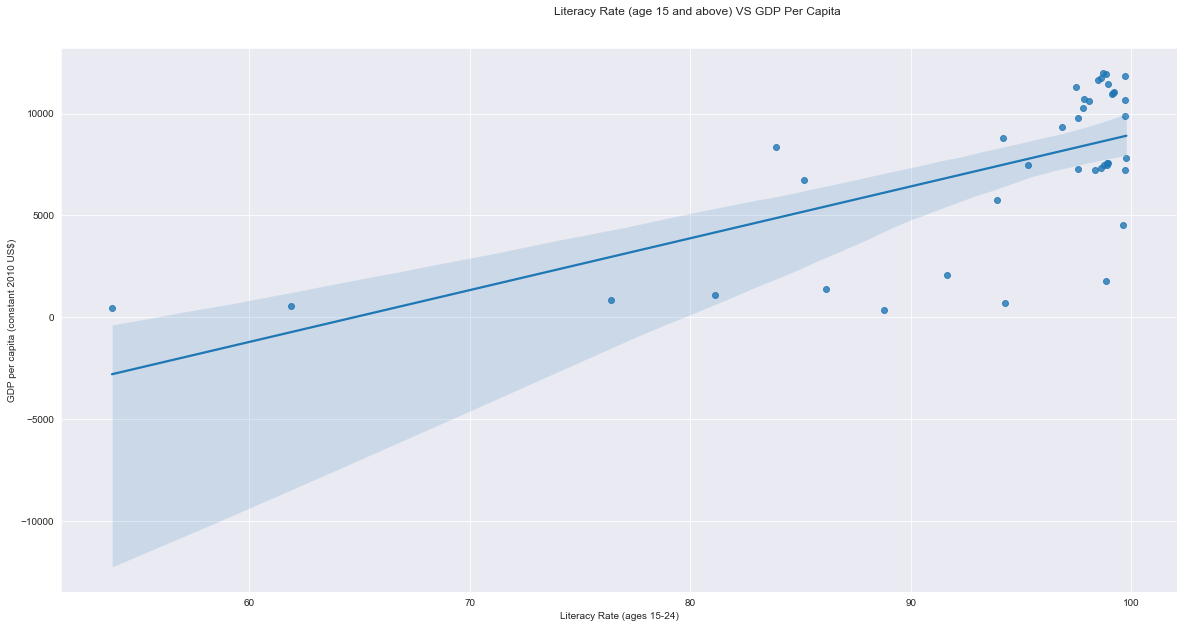

Jika dilihat dari plot regresi dapat disimpulkan bahwa terdapat kecenderungan korelasi positif antara tingkat literasi orang dewasa (diatas 15 tahun) dan remaja (15 - 24 tahun) dan GDP per kapita dari suatu negara. Hal ini bisa dijelaskan karena GDP yang semakin besar berimplikasi pada pendapatan negara yang besar dimana sekian persen dari pendapatan negara akan dialokasikan bagi kepentingan kependidikan seperti fasilitas sekolah, beragamnya buku bacaan, guru yang berkompetisi tinggi, sehingga membuat siswa baik remaja maupun orang dewasa yang telah selesai mengenyam pendidikan cenderung memiliki tingkat literasi yang tinggi


In [6]:
# Saya ingin mengetahui beberapa negara teratas dengan GDP (Gross Domestic Product) per kapita tertinggi

g = sns.catplot(x="CountryName", y="GDP per capita (constant 2010 US$)", kind="bar", data=df1)
g.fig.suptitle("GDP Per Capita in each country",x=0.57, y=1.05)
plt.xticks(rotation=90)
plt.show()

print("Berdasarkan plot diagram dapat dilihat bahwa dari 5 negara, negara dengan rata - rata GDP per kapita dari 1970 - 2010 terbesar adalah 1. Russia, 2. Brazil, 3. South Afrika, 4. China, 5. India")

# Trend kenaikan GDP Per kapita dari masing - masing negara
sns.set_style("darkgrid")
plt.figure(figsize=(40,20))
g = sns.relplot(x="Year", y="GDP per capita (constant 2010 US$)", kind="line", col="CountryName", col_wrap=3, data=df1)
g.fig.suptitle("Trend Of GDP Per Capita per years", y=1.05)
plt.xticks(rotation=90)
plt.show()

print("Dapat dilihat bahwa China mengalami trend kenaikan GDP yang terbesar sejak tahun 2000")

# Kemudian kita lihat sebaran "Literacy Rate" dari tiap populasi di masing - masing negara untuk remaja (15 - 24) dan dewasa
# (diatas 15)

g = sns.catplot(x="CountryName", y="Literacy rate, adult total (% of people ages 15 and above)", kind="bar", data=df2)
g.fig.suptitle("Literacy Rate (age 15 and above)",x=0.57, y=1.05)
plt.xticks(rotation=90)
plt.show()

print("Berdasarkan grafik dapat dilihat Russia memiliki tingkat literasi terbesar sebesar 100 % dan India dengan tingkat literasi terendah sebesar 59 % untuk orang dewasa diatas 15 tahun")

g = sns.catplot(x="CountryName", y="Literacy rate, youth total (% of people ages 15-24)", kind="bar", data=df2)
g.fig.suptitle("Literacy Rate (age 15 - 24)",x=0.57, y=1.05)
plt.xticks(rotation=90)
plt.show()

print("Berdasarkan grafik dapat dilihat Russia memiliki tingkat literasi terbesar sebesar 100 % dan India dengan tingkat literasi terendah sebesar 75 % untuk remaja usia 15 - 24 tahun")

# Melakukan Merging untuk kolom - kolom dari df1 dan df2 untuk dibuat scatterplot dari hubungan masing - masing variabel

df1_1 = pd.merge(df1[["CountryName", "CountryCode", "Year", "GDP per capita (constant 2010 US$)"]], df2[["CountryName", "CountryCode", "Year", 
                                                                                        "Literacy rate, adult total (% of people ages 15 and above)",
                                                                                                        "Literacy rate, youth total (% of people ages 15-24)"]],
                 on=["CountryName", "CountryCode", "Year"], how="outer")


# Plot korelasi antara tingkat literasi orang dewasa dan GDP per kapita
plt.figure(figsize=(20,10))
g = sns.regplot(x="Literacy rate, adult total (% of people ages 15 and above)", y="GDP per capita (constant 2010 US$)", data=df1_1)
g.set_title("Literacy Rate (age 15 and above) VS GDP Per Capita",x=0.57, y=1.05)
plt.xlabel("Literacy Rate (ages 15 above)")
plt.show()

# Plot korelasi antara tingkat literasi anak remaja dan GDP per kapita
plt.figure(figsize=(20,10))
g = sns.regplot(x="Literacy rate, youth total (% of people ages 15-24)", y="GDP per capita (constant 2010 US$)", data=df1_1)
g.set_title("Literacy Rate (age 15 and above) VS GDP Per Capita",x=0.57, y=1.05)
plt.xlabel("Literacy Rate (ages 15-24)")
plt.show()

print("Jika dilihat dari plot regresi dapat disimpulkan bahwa terdapat kecenderungan korelasi positif antara tingkat literasi orang dewasa (diatas 15 tahun) dan remaja (15 - 24 tahun) dan GDP per kapita dari suatu negara. Hal ini bisa dijelaskan karena GDP yang semakin besar berimplikasi pada pendapatan negara yang besar dimana sekian persen dari pendapatan negara akan dialokasikan bagi kepentingan kependidikan seperti fasilitas sekolah, beragamnya buku bacaan, guru yang berkompetisi tinggi, sehingga membuat siswa baik remaja maupun orang dewasa yang telah selesai mengenyam pendidikan cenderung memiliki tingkat literasi yang tinggi")

#### 2. Kemudian ingin diketahui hubungan antara akses listrik dengan angka fertility rate (banyaknya anak yang lahir / 1 ibu)
Note : Narasi dari analasis dan grafik dapat dilihat di output cell

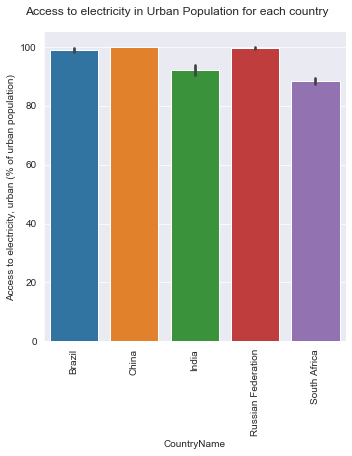

Di Rusia dan China, 100 % populasi di daerah perkotaan memilki akses listrik. Sedangkan di Brazil, Afrika Selatan, dan India masih terdapat penduduk yang belum memiliki akses listrik. Hal ini memungkinkan karena berdasarkan diagram batang sebelumnya terlihat bahwa India memiliki GDP Per Kapita yang paling rendah sehingga memungkinkan masih adanya 7% populasi perkotaan yang belum memiliki akses listrik


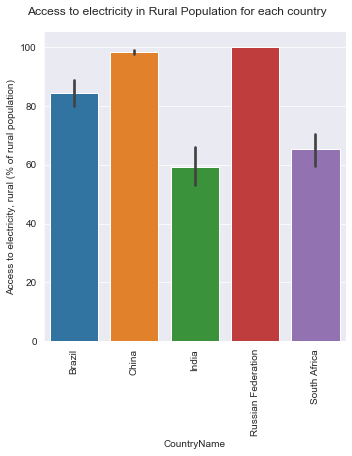

Ternyata di Rusia 100% populasi pedesaan telah memiliki akses listrik dan 99% populasi perkotaan di China telah memiliki akses listrik. Sedangkan masih terdapat 42% populasi pedesaan di India yang belum memiliki akses listrik. Adapun masih terdapat 16% populasi pedesaan di Brazil belum memiliki akses listrik. Hal ini lebih banyak dibandingkan China yang hanya 1% populasi pedesaan yang tidak memiliki akses listrik yang dimana China memiliki rata - rata GDP Per Kapita yang lebih rendah daripada Brazil. Hal ini menyimpulkan bahwa rata - rata GDP Per Kapita suatu negara tidak cukup berkorelasi positif terhadap akses listrik di suatu negara


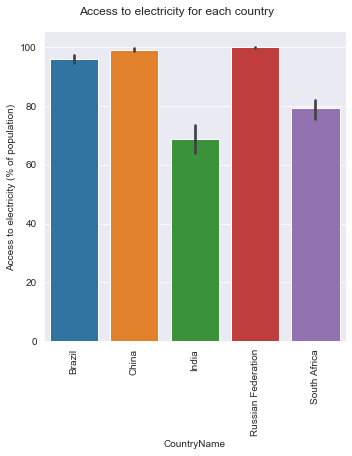

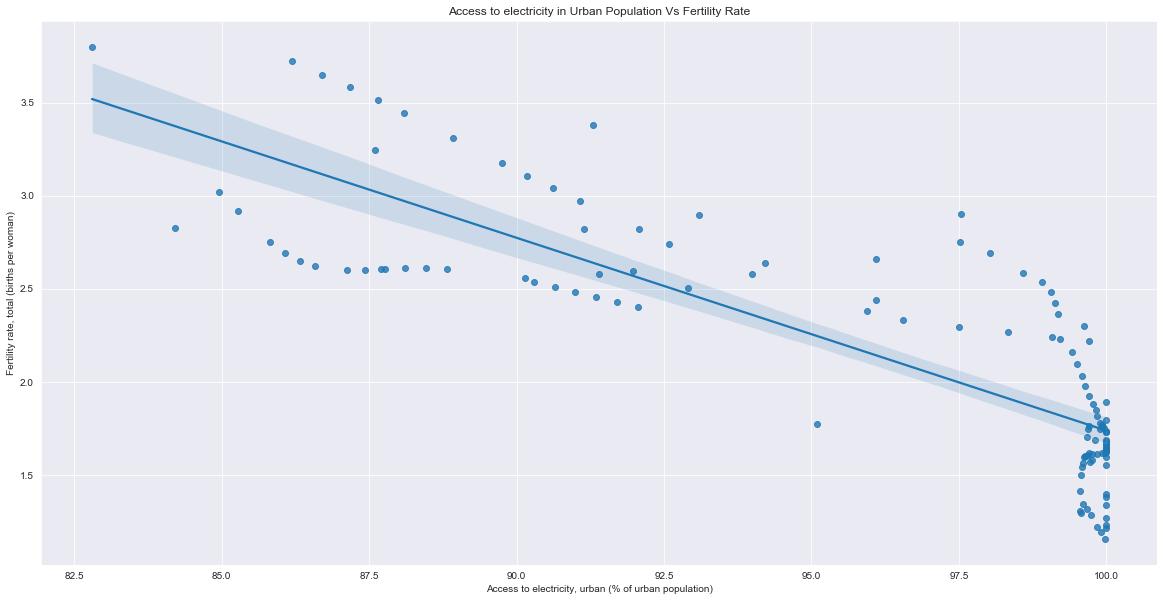

Berdasarkan plot regresi diatas dapat disimpulkan bahwa akses listrik dan angka fertility rate berkolerasi negatif. Hal ini cukup masuk akal karena semakin besarnya persentase populasi yang memiliki akses listrik berimplikasi pada semakin sejahteranya wilayah tersebut. Sejahteranya suatu wilayah cenderung menandakan bahwa penduduk - penduduknya memiliki pekerjaan yang cenderung memakan lebih banyak waktu sehingga mereka enggan memiliki banyak anak karena waktu mereka yang terbatas. Akibatnya hal ini berkolerasi terhadap semakin sedikitnya / kecilnya angka fertlity rate.


In [7]:
# Saya ingin mengetahui persentase populasi yang memiliki akses listrik pada masing - masing negara
# 1. Akses Listrik pada area perkotaan
g = sns.catplot(x="CountryName", y="Access to electricity, urban (% of urban population)", kind="bar", data=df2)
g.fig.suptitle("Access to electricity in Urban Population for each country", y="1.04")
plt.xticks(rotation=90)
plt.show()

print("Di Rusia dan China, 100 % populasi di daerah perkotaan memilki akses listrik. Sedangkan di Brazil, Afrika Selatan, dan India masih terdapat penduduk yang belum memiliki akses listrik. Hal ini memungkinkan karena berdasarkan diagram batang sebelumnya terlihat bahwa India memiliki GDP Per Kapita yang paling rendah sehingga memungkinkan masih adanya 7% populasi perkotaan yang belum memiliki akses listrik")

# 2. Akses Listrik pada area pedesaan
g = sns.catplot(x="CountryName", y="Access to electricity, rural (% of rural population)", data=df2, kind="bar")
g.fig.suptitle("Access to electricity in Rural Population for each country", y=1.04)
plt.xticks(rotation=90)
plt.show()

print("Ternyata di Rusia 100% populasi pedesaan telah memiliki akses listrik dan 99% populasi perkotaan di China telah memiliki akses listrik. Sedangkan masih terdapat 42% populasi pedesaan di India yang belum memiliki akses listrik. Adapun masih terdapat 16% populasi pedesaan di Brazil belum memiliki akses listrik. Hal ini lebih banyak dibandingkan China yang hanya 1% populasi pedesaan yang tidak memiliki akses listrik yang dimana China memiliki rata - rata GDP Per Kapita yang lebih rendah daripada Brazil. Hal ini menyimpulkan bahwa rata - rata GDP Per Kapita suatu negara tidak cukup berkorelasi positif terhadap akses listrik di suatu negara")

# 3. Akses listrik pada akumulasi area perkotaan dan area pedesaan
g = sns.catplot(x="CountryName", y="Access to electricity (% of population)", data=df2, kind="bar")
g.fig.suptitle("Access to electricity for each country", y=1.04)
plt.xticks(rotation=90)
plt.show()


# Kemudian saya akan melakukan scatter plot antara akses listrik dengan ankga fertility rate (banyaknya anak yang lahir / 1 ibu)
environ_health = pd.merge(df2[["CountryName", "CountryCode", "Year", "Access to electricity, urban (% of urban population)",
                               "Access to electricity, rural (% of rural population)",
                               "Access to electricity (% of population)"]], df3[["CountryName", "CountryCode", "Year", "Fertility rate, total (births per woman)"]],
                         on=["CountryName", "CountryCode", "Year"], how="inner")

plt.figure(figsize=(20,10))
g = sns.regplot(x="Access to electricity, urban (% of urban population)", y="Fertility rate, total (births per woman)", data=environ_health)
g.set_title("Access to electricity in Urban Population Vs Fertility Rate")
plt.show()

print("Berdasarkan plot regresi diatas dapat disimpulkan bahwa akses listrik dan angka fertility rate berkolerasi negatif. Hal ini cukup masuk akal karena semakin besarnya persentase populasi yang memiliki akses listrik berimplikasi pada semakin sejahteranya wilayah tersebut. Sejahteranya suatu wilayah cenderung menandakan bahwa penduduk - penduduknya memiliki pekerjaan yang cenderung memakan lebih banyak waktu sehingga mereka enggan memiliki banyak anak karena waktu mereka yang terbatas. Akibatnya hal ini berkolerasi terhadap semakin sedikitnya / kecilnya angka fertlity rate.")

## Conclusion
Dapat disimpulkan bahwa tingkat literasi dan GDP per Kapita berkolerasi positif dan akses listrik berkolerasi negatif dengan fertility rate dimana semakin besar persentasi populasi yang memiliki akses listrik, maka semakin kecil angka fertility rate nya. 